<a href="https://colab.research.google.com/github/Manu8271/honeypot/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving AWS_Honeypot.csv to AWS_Honeypot.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
print(f"version: {sklearn.__version__}")

version: 1.2.2


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded["AWS_Honeypot.csv"]))
print(df)

            datetime               host         src proto  type      spt  \
0       3/3/13 21:53     groucho-oregon  1032051418   TCP   NaN   6000.0   
1       3/3/13 21:57     groucho-oregon  1347834426   UDP   NaN   5270.0   
2       3/3/13 21:58     groucho-oregon  2947856490   TCP   NaN   2489.0   
3       3/3/13 21:58    groucho-us-east   841842716   UDP   NaN  43235.0   
4       3/3/13 21:58  groucho-singapore  3587648279   TCP   NaN  56577.0   
...              ...                ...         ...   ...   ...      ...   
451576   9/8/13 5:54     groucho-oregon  1922977453   TCP   NaN  62175.0   
451577   9/8/13 5:50         groucho-eu  1017974360   TCP   NaN   6000.0   
451578   9/8/13 5:55     groucho-oregon  3234358955   TCP   NaN   6000.0   
451579   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   
451580   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   

           dpt           srcstr  cc        country         locale localeabbr  \
0      

In [4]:
df.head().T

,0,1,2,3,4
datetime,3/3/13 21:53,3/3/13 21:57,3/3/13 21:58,3/3/13 21:58,3/3/13 21:58
host,groucho-oregon,groucho-oregon,groucho-oregon,groucho-us-east,groucho-singapore
src,1032051418,1347834426,2947856490,841842716,3587648279
proto,TCP,UDP,TCP,UDP,TCP
type,NaN,NaN,NaN,NaN,NaN
spt,6000.0,5270.0,2489.0,43235.0,56577.0
dpt,1433.0,5060.0,1080.0,1900.0,80.0
srcstr,61.131.218.218,80.86.82.58,175.180.184.106,50.45.128.28,213.215.43.23
cc,CN,DE,TW,US,FR
country,China,Germany,Taiwan,United States,France


In [5]:
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     451581 non-null  object 
 1   host         451581 non-null  object 
 2   src          451581 non-null  int64  
 3   proto        451581 non-null  object 
 4   type         44811 non-null   float64
 5   spt          406770 non-null  float64
 6   dpt          406770 non-null  float64
 7   srcstr       451581 non-null  object 
 8   cc           447985 non-null  object 
 9   country      447947 non-null  object 
 10  locale       342112 non-null  object 
 11  localeabbr   331705 non-null  object 
 12  postalcode   86478 non-null   object 
 13  latitude     448112 non-null  float64
 14  longitude    448153 non-null  float64
 15  Unnamed: 15  83 non-null      float64
dtypes: float64(6), int64(1), object(9)
memory usage: 55.1+ MB


In [16]:
from sklearn.preprocessing import StandardScaler

d=df
d = d.drop('datetime', axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

d.host = le.fit_transform(d.host)
d.proto = le.fit_transform(d.proto)
d.cc = le.fit_transform(d.cc)
d.country = le.fit_transform(d.country)
d.locale = le.fit_transform(d.locale)



d = d.drop('srcstr', axis=1)
d = d.drop('localeabbr', axis=1)


d = d.drop('postalcode', axis=1)
X=d
X=X.dropna()
X.head().T

,0,1,2,3,4
host,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,4.000000e+00
src,1.032051e+09,1.347834e+09,2.947856e+09,8.418427e+08,3.587648e+09
proto,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00
spt,6.000000e+03,5.270000e+03,2.489000e+03,4.323500e+04,5.657700e+04
dpt,1.433000e+03,5.060000e+03,1.080000e+03,1.900000e+03,8.000000e+01
cc,3.400000e+01,4.100000e+01,1.590000e+02,1.630000e+02,5.400000e+01
country,3.600000e+01,5.700000e+01,1.570000e+02,1.690000e+02,5.400000e+01
locale,3.900000e+02,1.179000e+03,1.020000e+03,6.810000e+02,1.179000e+03
latitude,2.855000e+01,5.100000e+01,2.503920e+01,4.558480e+01,4.886000e+01
longitude,1.159333e+02,9.000000e+00,1.215250e+02,-1.229117e+02,2.350000e+00


In [17]:
X.isnull().sum()

host         0
src          0
proto        0
spt          0
dpt          0
cc           0
country      0
locale       0
latitude     0
longitude    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'y')

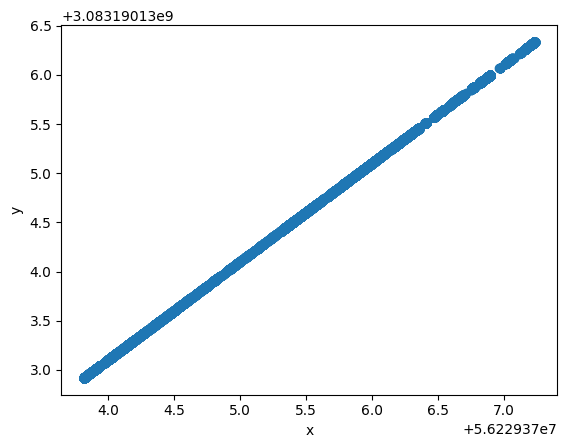

In [30]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)
X_kmeans = kmeans.transform(X_scaled)

plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1])
plt.xlabel("x")
plt.ylabel("y")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'y')

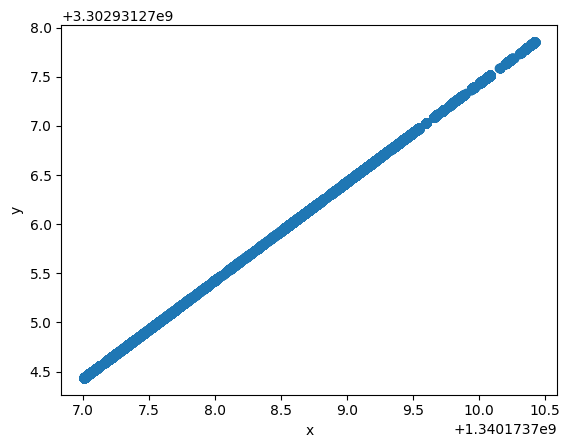

In [31]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
X_kmeans = kmeans.transform(X_scaled)

plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1])
plt.xlabel("x")
plt.ylabel("y")